In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,plot_confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
df_hungarian = pd.read_csv('/content/drive/MyDrive/datasets/processed.hungarian.data', header = None)
df_switzerland = pd.read_csv('/content/drive/MyDrive/datasets/processed.switzerland.data', header = None)
df_cleveland = pd.read_csv('/content/drive/MyDrive/datasets/processed.cleveland.data', header = None)

df1 = pd.concat([df_hungarian, df_switzerland], ignore_index=True)
df = pd.concat([ df1, df_cleveland],ignore_index=True)

df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,28.0,1.0,2.0,130,132,0,2,185,0,0.0,?,?,?,0
1,29.0,1.0,2.0,120,243,0,0,160,0,0.0,?,?,?,0
2,29.0,1.0,2.0,140,?,0,0,170,0,0.0,?,?,?,0
3,30.0,0.0,1.0,170,237,0,1,170,0,0.0,?,?,6,0
4,31.0,0.0,2.0,100,219,0,1,150,0,0.0,?,?,?,0


In [ ]:
df.shape

(720, 14)


The feature names and their meanings are:

0. age: age in years

1. sex: sex (1 = male; 0 = female)

2. cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

3. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

4. chol: serum cholestoral in mg/dl

5. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

6. restecg: resting electrocardiographic results
-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

7. thalach: maximum heart rate achieved

8. exang: exercise induced angina (1 = yes; 0 = no)

9. oldpeak = ST depression induced by exercise relative to rest

10. slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping

11. ca: number of major vessels (0-3) colored by flourosopy

12. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label

  Target:
13.  condition: 0 = no disease, 1 = disease


# **Data Pre-processing and cleaning**

1. Change the feature name to make it more convenient to understand.

2. Remove null values

3. Check the unique values of the dataframe and see if it matches the dataset description

4. Check datatype

In [ ]:
df.columns = ['age',
           'sex',
           'chestPainType',
           'atRestBps', 
           'cholestrol', 
           'fastingBloodSugar',
           'atrestEcg', 
           'maxHeartRate', 
           'excerciseInducedangina',
           'oldpeak' , 
           'Slope',
           'ca',
           'thal', 
           'heartDisease']

In [ ]:
df.head()

,age,sex,chestPainType,atRestBps,cholestrol,fastingBloodSugar,atrestEcg,maxHeartRate,excerciseInducedangina,oldpeak,Slope,ca,thal,heartDisease
0,28.0,1.0,2.0,130,132,0,2,185,0,0.0,?,?,?,0
1,29.0,1.0,2.0,120,243,0,0,160,0,0.0,?,?,?,0
2,29.0,1.0,2.0,140,?,0,0,170,0,0.0,?,?,?,0
3,30.0,0.0,1.0,170,237,0,1,170,0,0.0,?,?,6,0
4,31.0,0.0,2.0,100,219,0,1,150,0,0.0,?,?,?,0


In [ ]:
df['heartDisease'].unique()

array([0, 1, 3, 2, 4])

In [ ]:
df['heartDisease'] = np.where(df['heartDisease'] > 0, 1,0)
df['heartDisease'].unique()

array([0, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     720 non-null    float64
 1   sex                     720 non-null    float64
 2   chestPainType           720 non-null    float64
 3   atRestBps               720 non-null    object 
 4   cholestrol              720 non-null    object 
 5   fastingBloodSugar       720 non-null    object 
 6   atrestEcg               720 non-null    object 
 7   maxHeartRate            720 non-null    object 
 8   excerciseInducedangina  720 non-null    object 
 9   oldpeak                 720 non-null    object 
 10  Slope                   720 non-null    object 
 11  ca                      720 non-null    object 
 12  thal                    720 non-null    object 
 13  heartDisease            720 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory

**Null Values**



In [ ]:
df = df.replace('?', np.NaN)

In [ ]:
df.isnull().sum() * 100 / len(df)

age                        0.000000
sex                        0.000000
chestPainType              0.000000
atRestBps                  0.416667
cholestrol                 3.194444
fastingBloodSugar         11.527778
atrestEcg                  0.277778
maxHeartRate               0.277778
excerciseInducedangina     0.277778
oldpeak                    0.833333
Slope                     28.750000
ca                        57.361111
thal                      44.444444
heartDisease               0.000000
dtype: float64

1. Around 45+ percent of ca and thal are null so drop this columns. 

2. Rows of the columns which make only 3% of the dataframe altogether are also removed. The rows which had two or more null values where also removed.

3. The remaining missing values will be dealt with KNN imputer after EDA.


In [ ]:
df.drop(['ca', 'thal'], axis = 1, inplace= True)

In [ ]:
df.dropna(subset = ['cholestrol', 'atRestBps',  'atrestEcg', 'maxHeartRate', 'excerciseInducedangina', 'oldpeak'], inplace = True)

In [ ]:
df.dropna(thresh=2, inplace = True)

In [ ]:
df.shape

(688, 12)

In [ ]:
imputer = KNNImputer(n_neighbors=3)
df_filled = imputer.fit_transform(df[['oldpeak', 'Slope', 'heartDisease']])

In [ ]:
df_filled= pd.DataFrame(df_filled)
df_filled.columns = ['oldpeak', 'slope', 'heartDisease']
df_filled.drop(['oldpeak', 'heartDisease'], inplace = True, axis = 1)

In [ ]:
df_filled['slope'].unique()

array([1.33333333, 2.        , 1.        , 3.        ])

In [ ]:
df_filled['slope'] = np.where(df_filled['slope'] < 2, 1, df_filled['slope'])

In [ ]:
df_filled

,slope
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
683,2.0
684,2.0
685,2.0
686,2.0


In [ ]:
df = pd.concat([df.reset_index(drop=True), df_filled.reset_index(drop=True)], axis=1)

In [ ]:
df = df.drop(['Slope'], axis = 1)
df

,age,sex,chestPainType,atRestBps,cholestrol,fastingBloodSugar,atrestEcg,maxHeartRate,excerciseInducedangina,oldpeak,heartDisease,slope
0,28.0,1.0,2.0,130,132,0,2,185,0,0.0,0,1.0
1,29.0,1.0,2.0,120,243,0,0,160,0,0.0,0,1.0
2,30.0,0.0,1.0,170,237,0,1,170,0,0.0,0,1.0
3,31.0,0.0,2.0,100,219,0,1,150,0,0.0,0,1.0
4,32.0,0.0,2.0,105,198,0,0,165,0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
683,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,1,2.0
684,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,1,2.0
685,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,1,2.0
686,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,1,2.0


In [ ]:
df.isnull().sum()

age                        0
sex                        0
chestPainType              0
atRestBps                  0
cholestrol                 0
fastingBloodSugar         78
atrestEcg                  0
maxHeartRate               0
excerciseInducedangina     0
oldpeak                    0
heartDisease               0
slope                      0
dtype: int64

In [ ]:
unique = []
for col in df:
  uni = df[col].nunique()
  unique.append([col, uni])

unique

[['age', 49],
 ['sex', 2],
 ['chestPainType', 4],
 ['atRestBps', 85],
 ['cholestrol', 306],
 ['fastingBloodSugar', 4],
 ['atrestEcg', 6],
 ['maxHeartRate', 185],
 ['excerciseInducedangina', 4],
 ['oldpeak', 76],
 ['heartDisease', 2],
 ['slope', 3]]

In [ ]:
df.dtypes

age                       float64
sex                       float64
chestPainType             float64
atRestBps                  object
cholestrol                 object
fastingBloodSugar          object
atrestEcg                  object
maxHeartRate               object
excerciseInducedangina     object
oldpeak                    object
heartDisease                int64
slope                     float64
dtype: object

FastingBloodSugar should have 2(3 for null) values but has 4

atrestEcg should have 3 values but has 6

excerciseInducedangina should have 2 values but has 4

slope should have 3(4 for null) values but has 6

This due to the combination of 3 datasets, each has its own way of representing the same value. So, a common form is established.

Also, even though they are all numerical values, datatype is object. This is to be changed



In [ ]:
for col in df:
  df[col] = np.where(df[col] == '0', 0, df[col])
  df[col] = np.where(df[col] == '1', 1, df[col])
  df[col] = np.where(df[col] == '2', 2, df[col])
  df[col] = np.where(df[col] == '3', 3, df[col])


In [ ]:
unique = []
for col in df[['fastingBloodSugar', 'atrestEcg', 'excerciseInducedangina', 'slope']]:
  uni = df[col].unique()
  unique.append([col, uni])

unique

[['fastingBloodSugar', array([0, nan, 1], dtype=object)],
 ['atrestEcg', array([2, 0, 1], dtype=object)],
 ['excerciseInducedangina', array([0, 1], dtype=object)],
 ['slope', array([1., 2., 3.])]]

In [ ]:
df[['age','sex','chestPainType','atRestBps','cholestrol', 'atrestEcg', 'maxHeartRate', 'excerciseInducedangina','oldpeak','heartDisease', 'slope', 'fastingBloodSugar']]  = df[['age','sex','chestPainType','atRestBps','cholestrol', 'atrestEcg', 'maxHeartRate', 'excerciseInducedangina','oldpeak','heartDisease', 'slope', 'fastingBloodSugar']].apply(pd.to_numeric)

# The dataset has been cleaned.



# **Explarotary Data Analysis**

Tha dataframe has already been encoded. It is rather hard to understand an 

already encoded dataframe. So, the dataframe values is gonna be converted into 

strings when needed. This is gonna be done by creating a new dataframe to 

preserve the already ordinal encoded dataframe.

In [ ]:
cat_df = df.copy()

In [ ]:
cat_df.head()

,age,sex,chestPainType,atRestBps,cholestrol,fastingBloodSugar,atrestEcg,maxHeartRate,excerciseInducedangina,oldpeak,heartDisease,slope
0,28.0,1.0,2.0,130.0,132.0,0.0,2,185.0,0,0.0,0,1.0
1,29.0,1.0,2.0,120.0,243.0,0.0,0,160.0,0,0.0,0,1.0
2,30.0,0.0,1.0,170.0,237.0,0.0,1,170.0,0,0.0,0,1.0
3,31.0,0.0,2.0,100.0,219.0,0.0,1,150.0,0,0.0,0,1.0
4,32.0,0.0,2.0,105.0,198.0,0.0,0,165.0,0,0.0,0,1.0


In [ ]:
cat_df['sex'] = np.where(cat_df['sex'] == 1, 'male','female')
cat_df['excerciseInducedangina'] = np.where(cat_df['excerciseInducedangina'] == 1, 'yes','no')

In [ ]:
cat_df['chestPainType'].replace(1, 'typical_angina', inplace = True)
cat_df['chestPainType'].replace(2, 'atypical_angina', inplace = True)
cat_df['chestPainType'].replace(3, 'non_anginal', inplace = True)
cat_df['chestPainType'].replace(4, 'asymptomatic', inplace = True)

In [ ]:
cat_df['atrestEcg'].replace(0, 'normal', inplace = True)
cat_df['atrestEcg'].replace(1, 'ST-T_wave_abnormality', inplace = True)
cat_df['atrestEcg'].replace(2, 'probable_or_definite_left_ventricular_hypertrophy', inplace = True)

In [ ]:
cat_df['slope'].replace(1, 'upsloping', inplace = True)
cat_df['slope'].replace(2, 'flat', inplace = True)
cat_df['slope'].replace(3, 'downsloping', inplace = True)

In [ ]:
cat_df['fastingBloodSugar'][cat_df['fastingBloodSugar'] == 1] = 'yes'
cat_df['fastingBloodSugar'][cat_df['fastingBloodSugar'] == 0] = 'no'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
cat_df.describe(include =[np.number])

,age,atRestBps,cholestrol,maxHeartRate,oldpeak,heartDisease
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,52.014535,131.720930,206.577035,140.875000,0.805378,0.504360
std,9.151153,18.496092,107.887064,25.521098,1.075281,0.500345
min,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000
25%,45.000000,120.000000,184.000000,122.000000,0.000000,0.000000
50%,53.000000,130.000000,228.000000,143.000000,0.250000,1.000000
75%,58.000000,140.000000,270.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


In [ ]:
cat_df.describe(include =[np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,sex,chestPainType,fastingBloodSugar,atrestEcg,excerciseInducedangina,slope
count,688,688,610,688,688,688
unique,2,4,2,3,2,3
top,male,asymptomatic,no,normal,no,flat
freq,508,351,542,447,453,329


**Distribution of Heart Disease patient**

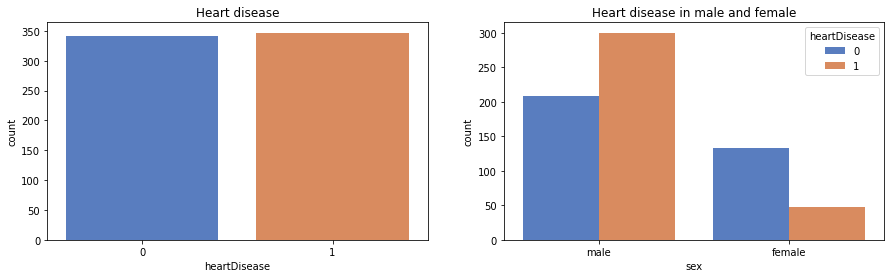

In [ ]:
plt.figure(figsize= (15,4))
plt.subplot(121)
sns.countplot(x = 'heartDisease', data = cat_df, palette = 'muted')
plt.title('Heart disease')

plt.subplot(122)
sns.countplot(x = 'sex', hue = 'heartDisease', data = cat_df, palette = 'muted')
plt.title('Heart disease in male and female')

plt.tight_layout
plt.show()

Text(0.5, 1.0, 'Chest pain type of Heart Patients')

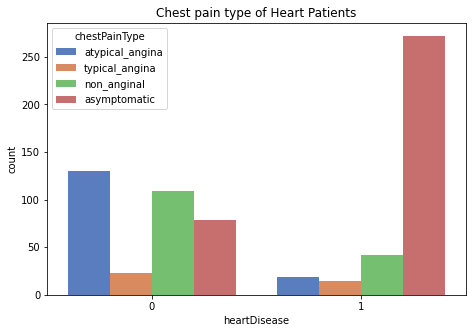

In [ ]:
plt.figure(figsize= (7.5,5))
sns.countplot(hue = 'chestPainType', x = 'heartDisease', data = cat_df, palette = 'muted')
plt.title('Chest pain type of Heart Patients')

Text(0.5, 1.0, 'Blood Sugar')

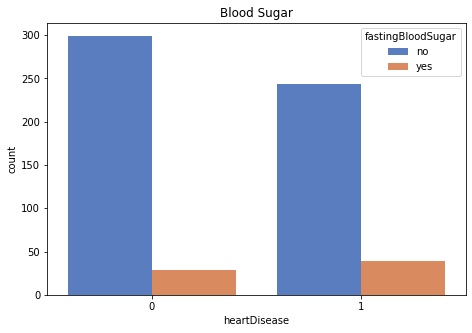

In [ ]:
plt.figure(figsize= (7.5,5))
sns.countplot(x = 'heartDisease', hue = 'fastingBloodSugar', data = cat_df, palette = 'muted')
plt.title('Blood Sugar')

Text(0.5, 1.0, 'At rest ECG outcome')

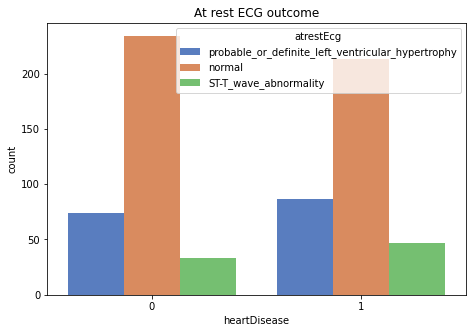

In [ ]:
plt.figure(figsize= (7.5,5))
sns.countplot(hue = 'atrestEcg', x = 'heartDisease', data = cat_df, palette = 'muted')
plt.title('At rest ECG outcome')

Text(0.5, 1.0, 'Type of slope')

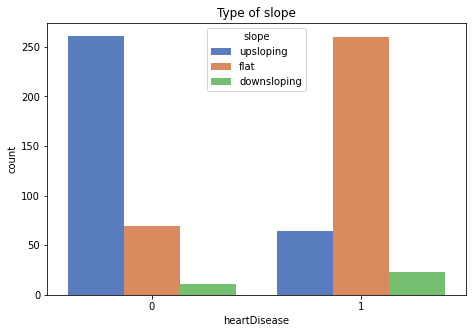

In [ ]:
plt.figure(figsize= (7.5,5))
sns.countplot(hue = 'slope', x = 'heartDisease', data = cat_df, palette = 'muted')
plt.title('Type of slope')

Text(0.5, 1.0, 'Excercise Induced Angina')

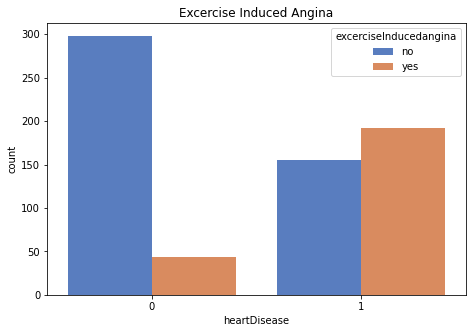

In [ ]:
plt.figure(figsize= (7.5,5))
sns.countplot(hue = 'excerciseInducedangina', x = 'heartDisease', data = cat_df, palette = 'muted')
plt.title('Excercise Induced Angina')

Text(0.5, 1.0, 'Heart disease based on ST wave depression')

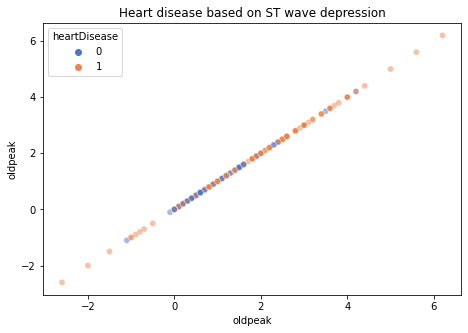

In [ ]:
plt.figure(figsize= (7.5,5))
sns.scatterplot( x= 'oldpeak',y ='oldpeak', hue = 'heartDisease' ,data = cat_df, palette = 'muted', alpha = 0.5)
plt.title('Heart disease based on ST wave depression')

ST wave depression and slope to predict Heart Disease

Text(0.5, 1.0, 'Relationship between Heart and ST wave depression based on slope type')

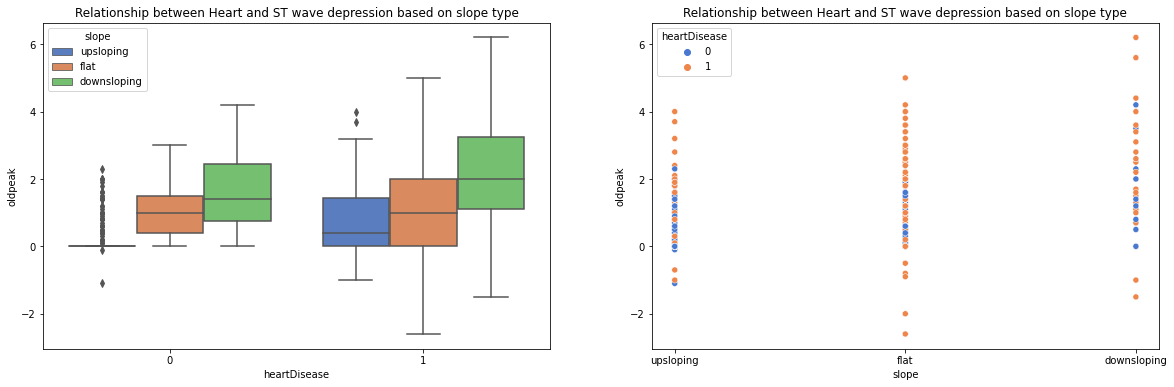

In [ ]:
plt.figure(figsize= (20,6))

plt.subplot(121)
sns.boxplot(hue = 'slope', y = 'oldpeak', data = cat_df, x = 'heartDisease'  , palette = 'muted')
plt.title('Relationship between Heart and ST wave depression based on slope type')

plt.subplot(122)
sns.scatterplot(x = 'slope', y = 'oldpeak', data = cat_df, hue = 'heartDisease'  , palette = 'muted')
plt.title('Relationship between Heart and ST wave depression based on slope type')

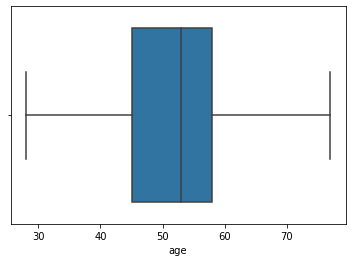

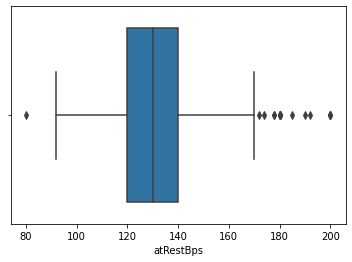

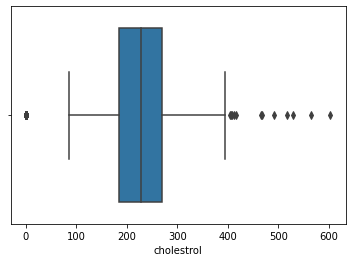

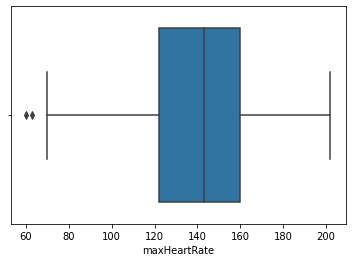

In [ ]:
for col in cat_df[['age', 'atRestBps', 'cholestrol','maxHeartRate']]:
  sns.boxplot( data = cat_df, x = cat_df[col])
  plt.show()

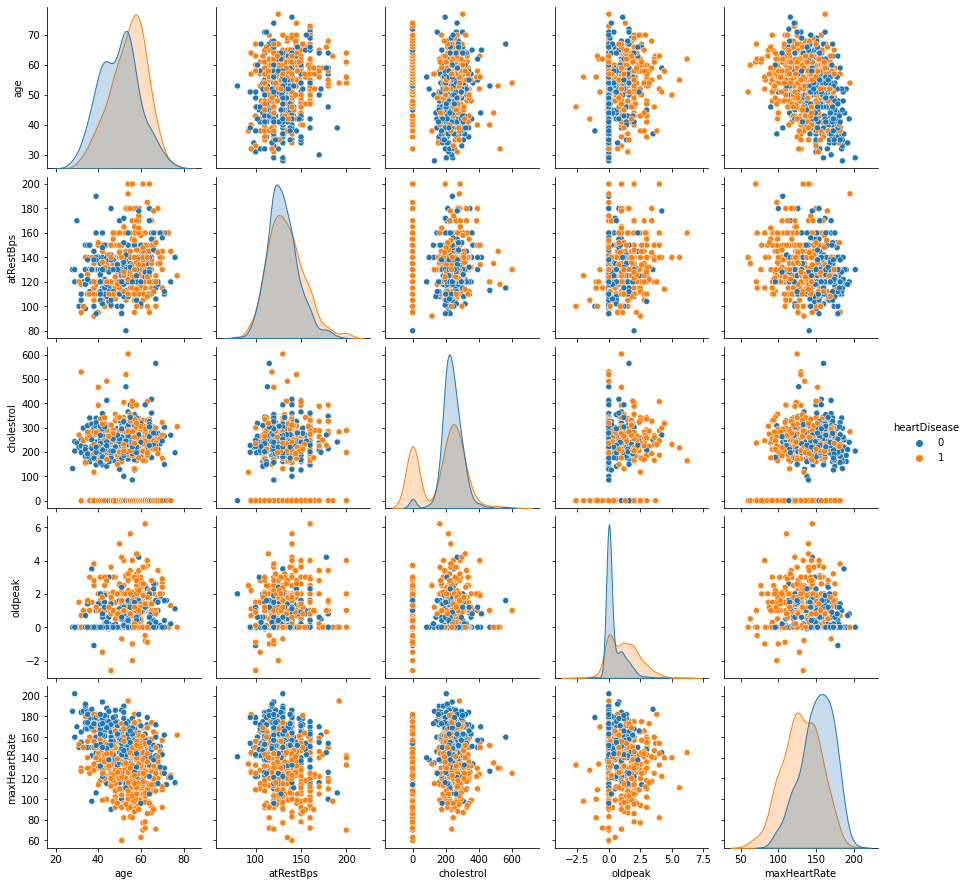

In [ ]:
sns.pairplot(cat_df, hue = 'heartDisease', vars = ['age', 'atRestBps', 'cholestrol', 'oldpeak', 'maxHeartRate']  )

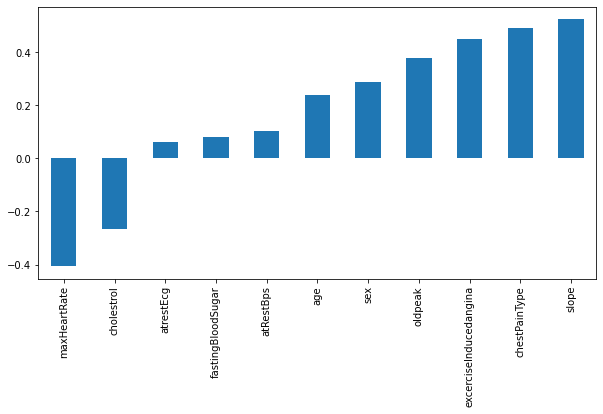

In [ ]:
plt.figure(figsize = (10,5))
df.corr()['heartDisease'].sort_values().drop('heartDisease').plot(kind = 'bar') 


# **Outcome of EDA**









*   The Dataset is balanced. Heart disease is more common in males

*   Patients with normal ECG are equally likely to have Heart Disease. So, ECG test results are inconclusive. Multiple tests with ECG is required to diagnose heart disease

*   Fasting Blood Sugar is inconclusive in determining the presence of heart disease.

*   Asymptomatic Angina is the most common type of chest pain for Heart Disease.

*   Patients who do not feel any chest pain during exercise are not likely to have heart disease.


*  Patients with upslope in ECG is least likely to have heart disease while patients with flat is most likely to have heart disease.

*   An oldpeak(ST wave depression) of 2 or higher confirms the presence of Heart Disease in most cases

*   Heart patients usually have flat slope and a ST wave depression of 2 or higher (in most cases above 1.5) or higher.

*   The probability of heart disease increases with age.

*  From the description of the dataset it has been seen that cholestrol has outliers(large difference between mean and median). This has been further confirmed by the pairplot.

*   With the decrease in maximum heart rate, the probability of heart attack increases.

*   Heart disease probability increases with Higher Blood pressure. Blood pressure also increases with age.


**Next Steps**



1.   Fasting Blood Sugar and at rest ECG are inconclusive so its best do drop them.

2.   Outlier Removal using capping.

3.   The dataset relationship is non-linear so Logistic regression is not to be used. The suggested. The following 3 models are to be used due to the non-linearity of the dataset:

      *   KNN
      *   Decision Tree
      *   Random Forest.


# **Outlier Detection, Feature selection**

In [ ]:
df.head()

,age,sex,chestPainType,atRestBps,cholestrol,fastingBloodSugar,atrestEcg,maxHeartRate,excerciseInducedangina,oldpeak,heartDisease,slope
0,28.0,1.0,2.0,130.0,132.0,0.0,2,185.0,0,0.0,0,1.0
1,29.0,1.0,2.0,120.0,243.0,0.0,0,160.0,0,0.0,0,1.0
2,30.0,0.0,1.0,170.0,237.0,0.0,1,170.0,0,0.0,0,1.0
3,31.0,0.0,2.0,100.0,219.0,0.0,1,150.0,0,0.0,0,1.0
4,32.0,0.0,2.0,105.0,198.0,0.0,0,165.0,0,0.0,0,1.0


In [ ]:
def iqr_capping(df, cols):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        ub = q3 + (1.5*iqr)
        lb = q1 - (1.5*iqr)

        df[col] = np.where(df[col]>ub, ub,
                        np.where(df[col]<lb, lb, df[col]))
  

In [ ]:
features = ['age', 'atRestBps', 'cholestrol', 'maxHeartRate']
iqr_capping(df,features)

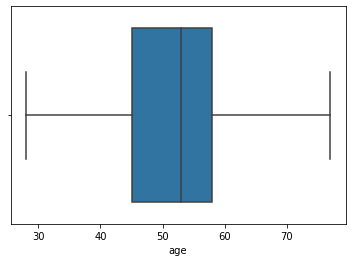

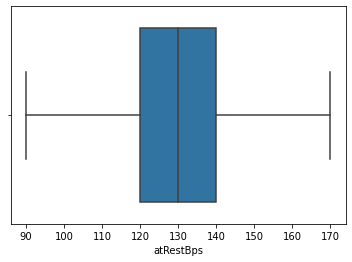

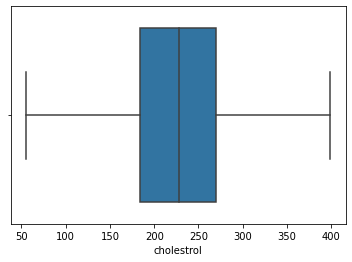

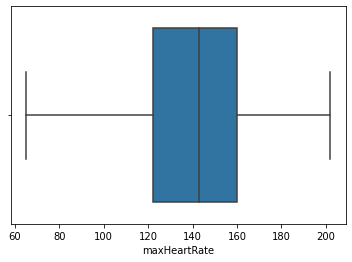

In [ ]:
for col in df[['age', 'atRestBps', 'cholestrol','maxHeartRate']]:
  sns.boxplot( data = df, x = df[col])
  plt.show()


In [ ]:
df.drop(['fastingBloodSugar', 'atrestEcg'], axis = 1, inplace = True)

In [ ]:
df.head()

,age,sex,chestPainType,atRestBps,cholestrol,maxHeartRate,excerciseInducedangina,oldpeak,heartDisease,slope
0,28.0,1.0,2.0,130.0,132.0,185.0,0,0.0,0,1.0
1,29.0,1.0,2.0,120.0,243.0,160.0,0,0.0,0,1.0
2,30.0,0.0,1.0,170.0,237.0,170.0,0,0.0,0,1.0
3,31.0,0.0,2.0,100.0,219.0,150.0,0,0.0,0,1.0
4,32.0,0.0,2.0,105.0,198.0,165.0,0,0.0,0,1.0


# Train test split, standardization

In [ ]:
X = df.drop(['heartDisease'], axis = 1)
y = df['heartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 20)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ***Model***



> KNN



In [ ]:
KNN_parameters = {
    'n_neighbors' : [ 3, 4, 5, 6, 8, 9, 10 ]
}

KNN_gridsearchcv = GridSearchCV(KNeighborsClassifier(), KNN_parameters)
KNN_gridsearchcv.fit(X_train, y_train)

KNN_model = KNN_gridsearchcv.best_estimator_
KNN_ypred = KNN_model.predict(X_test) 

In [ ]:
accuracy_score( y_test, KNN_ypred)

0.8081395348837209

In [ ]:
KNN_gridsearchcv.best_params_

{'n_neighbors': 8}



> Decision Tree



In [ ]:
model = DecisionTreeClassifier(random_state = 4)
path = model.cost_complexity_pruning_path(X_train,y_train) #determines values of alpha
ccp_alphas = path.ccp_alphas #extract the values of alpha
ccp_alphas = ccp_alphas[ :-1] #removes the highest value of alpha cause this will prune all leaves

ccp_alphas 


array([0.        , 0.00123326, 0.00128131, 0.00155039, 0.00169574,
       0.001716  , 0.00172265, 0.00177649, 0.00183599, 0.00184989,
       0.00185724, 0.00189248, 0.00206718, 0.00226098, 0.00229687,
       0.00237403, 0.00258398, 0.00271318, 0.00274548, 0.00286178,
       0.00290698, 0.00300636, 0.00303761, 0.00335917, 0.00337807,
       0.00341731, 0.00349583, 0.00352856, 0.00371447, 0.00378633,
       0.00387829, 0.00413437, 0.00424038, 0.00481018, 0.00570476,
       0.00597097, 0.00715564, 0.00884885, 0.01123827, 0.01124831,
       0.01183657, 0.01455529, 0.0275091 , 0.05488824])

In [ ]:
DT_parameters = {
    'ccp_alpha' : ccp_alphas,
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt', 'log2'],
    'splitter' : ['best','random']

    }

DT_gridsearchcv = GridSearchCV(DecisionTreeClassifier( random_state = 4), DT_parameters, n_jobs = -1)
DT_gridsearchcv.fit(X_train, y_train)

DT_model = DT_gridsearchcv.best_estimator_
DT_ypred = DT_model.predict(X_test) 

In [ ]:
accuracy_score(DT_ypred,y_test)

0.7906976744186046

In [ ]:
DT_gridsearchcv.best_params_

{'ccp_alpha': 0.008848852529337863,
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'best'}



> **Random Forest**



In [ ]:
RF_Parameters = {
               'n_estimators' : range( 10, 80, 5),               
               'max_samples' : range(344, 510, 20),
               'max_features' : ['sqrt', 'log2','None'],
                }


RF_gridsearchcv = GridSearchCV(RandomForestClassifier(ccp_alpha = 0.008848852529337863, max_depth = 6, n_jobs = -1), RF_Parameters)
RF_gridsearchcv.fit(X_train, y_train)

RF_model = RF_gridsearchcv.best_estimator_
RF_ypred = RF_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1330 fits failed out of a total of 1890.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 386, in fit
    n_samples=X.shape[0], max_samples=self.max_samples
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 111, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_sam

In [ ]:
accuracy_score(RF_ypred,y_test)

0.8604651162790697

In [ ]:
RF_gridsearchcv.best_params_

{'max_features': 'sqrt', 'max_samples': 344, 'n_estimators': 75}

In [ ]:
data = {         
           'KNN': KNN_ypred, 
           'DECISION TREE' : DT_ypred,
           'RANDOM FOREST' : RF_ypred, 
}

models = pd.DataFrame(data) 

model_results = pd.DataFrame(columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1 Score','ROC'])
    
 
for column in models:
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    results =pd.DataFrame([[column,acc, prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1 Score','ROC'])
    model_results = model_results.append(results, ignore_index = True)

model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.808140,0.819277,0.790698,0.804734,0.808140
1,DECISION TREE,0.790698,0.784091,0.802326,0.793103,0.790698
2,RANDOM FOREST,0.860465,0.836957,0.895349,0.865169,0.860465


Random Forest gives the best outcome. So, it will be used in the final model.